In [96]:
import pandas as pd
import numpy as np

In [97]:
df_cleaned = pd.read_csv('../data/interim/yellow_tripdata_2020-04_prepared.csv')

In [98]:
from src.data.sets import load_sets

X_train, y_train, X_val, y_val, X_test, y_test = load_sets(path='../data/processed/')

In [99]:
df = pd.DataFrame(X_train)
X_train = df.fillna(0).drop(columns=[1,2,6]).to_numpy()
notna_idx = pd.DataFrame(y_train).notna().to_numpy().flatten()
X_train, y_train = X_train[notna_idx], y_train[notna_idx]

In [100]:
df = pd.DataFrame(X_val)
X_val = df.fillna(0).drop(columns=[1,2,6]).to_numpy()
notna_idx = pd.DataFrame(y_val).notna().to_numpy().flatten()
X_val, y_val = X_val[notna_idx], y_val[notna_idx]

In [101]:
df = pd.DataFrame(X_test)
X_test = df.fillna(0).drop(columns=[1,2,6]).to_numpy()
notna_idx = pd.DataFrame(y_test).notna().to_numpy().flatten()
X_test, y_test = X_test[notna_idx], y_test[notna_idx]

In [49]:
import xgboost as xgb
from joblib import load 

In [50]:
xgboost2 = load('../models/xgboost_best.joblib')

In [51]:
feat_imp = xgboost2.get_booster().get_score(importance_type="gain")

In [52]:
mapper = {'f{0}'.format(i): v for i, v in enumerate(df_cleaned.columns)}

In [53]:
mapping = {mapper[k]: v for k, v in feat_imp.items()}

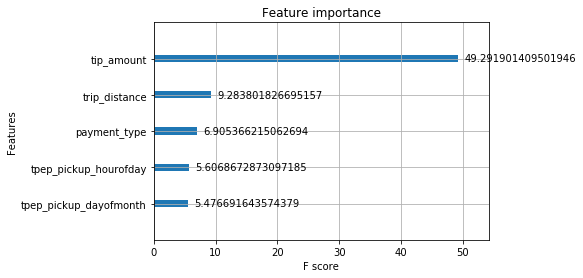

In [54]:
xgb.plot_importance(mapping, max_num_features=5)

In [55]:
from sklearn.inspection import permutation_importance

In [57]:
r = permutation_importance(
    xgboost2, X_train, y_train,
    n_repeats=30,
    random_state=8
)

In [58]:
for i in r.importances_mean.argsort()[::-1]:
     print(f"{df_cleaned.columns[i]}: {r.importances_mean[i]:.5f}")

tip_amount: 0.61661
trip_distance: 0.23702
tpep_pickup_dayofmonth: 0.02390
extra: 0.01985
fare_amount: 0.01790
Unnamed: 0: 0.01140
total_amount: 0.01073
payment_type: 0.00511
tolls_amount: 0.00498
passenger_count: 0.00359
tpep_pickup_hourofday: 0.00348
mta_tax: 0.00241
congestion_surcharge: 0.00138
trip_duration: 0.00054
improvement_surcharge: 0.00045


In [71]:
from sklearn.inspection import plot_partial_dependence

In [72]:
def plot_pdp(model, X, feature_name, feature_cols, target_classes):
    feature_index = feature_cols.get_loc(feature_name)
    
    print(feature_cols.get_loc(feature_name))
    
    print(f"PDP for `{feature_cols[feature_index]}` with {target_classes}")
    
    for target_class in target_classes:
        plot_partial_dependence(model, X, features=[feature_index], target=target_class)

In [73]:
target_classes=[0, 1, 2, 3]

In [74]:
plot_pdp(model=xgboost2, X=X_train, feature_name='payment_type', feature_cols=df_cleaned.columns, target_classes=target_classes)

3
PDP for `payment_type` with [0, 1, 2, 3]


TypeError: '<' not supported between instances of 'str' and 'int'

In [102]:
from lime.lime_tabular import LimeTabularExplainer

In [103]:
lime_explainer = LimeTabularExplainer(X_train,
      feature_names=df_cleaned.columns,
      class_names=target_classes,
      mode='classification',
      discretize_continuous=False
)

In [104]:
# X_train.shape
# print(pd.DataFrame(X_test[0]).drop(columns=[1,2,6]).to_numpy())
# xgboost2.predict_proba
X_test

array([[ 2.  ,  1.  ,  2.65, ...,  0.3 , 15.8 ,  2.5 ],
       [ 0.  ,  0.  ,  2.8 , ...,  0.3 , 18.84,  0.  ],
       [ 2.  ,  1.  ,  4.17, ...,  0.3 , 16.8 ,  2.5 ],
       ...,
       [ 1.  ,  1.  ,  1.1 , ...,  0.3 , 12.36,  2.5 ],
       [ 2.  ,  1.  ,  2.08, ...,  0.3 , 18.3 ,  2.5 ],
       [ 1.  ,  1.  ,  0.  , ...,  0.3 , 40.  ,  0.  ]])

In [106]:
exp = lime_explainer.explain_instance(
    pd.DataFrame(X_test[0]).drop(columns=[1,2,6]).to_numpy(), 
    xgboost2.predict_proba, 
    top_labels=1,
    num_features=20)

KeyError: '[1 2 6] not found in axis'